In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df=pd.read_csv('./Uber Request Data.csv')

In [81]:
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47


In [82]:
df.shape

(6745, 6)

<font color='blue'>DATA QUALITY CHECKS - NULL VALUE OBSERVATION</font>

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [84]:
df[df['Driver id'].isnull()].head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN


In [85]:
# Check for number duplicated rows are 0.
sum(df.duplicated(subset='Request id')) == 0

True

In [86]:
print(df.isnull().sum()*100/df.shape[0])

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


<font color='blue'>On observation, we understand the null values are populated in Driver Id when the status is 'Cancelled'.
</font>

<font color='blue'>Similarly for Drop timestamp, the null values are populated when the status is 'Cancelled' or 'No Cars Available'.</font>

<font color='blue'>So at this point, there will not be any action done for manipulating these  null values.</font>

In [87]:
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True)

In [88]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [89]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [90]:
df['Request Year']=df['Request timestamp'].dt.year
df['Request Month']=df['Request timestamp'].dt.month
df['Request Day']=df['Request timestamp'].dt.day
df['Request Hour']=df['Request timestamp'].dt.hour
df['Request Minute']=df['Request timestamp'].dt.minute

In [91]:
df['Drop Year']=df['Drop timestamp'].dt.year
df['Drop Month']=df['Drop timestamp'].dt.month
df['Drop Day']=df['Drop timestamp'].dt.day
df['Drop Hour']=df['Drop timestamp'].dt.hour
df['Drop Minute']=df['Drop timestamp'].dt.minute

<font color='blue'>Rearranging Columns</font>

In [92]:
cols = list(df.columns.values)
cols

['Request id',
 'Pickup point',
 'Driver id',
 'Status',
 'Request timestamp',
 'Drop timestamp',
 'Request Year',
 'Request Month',
 'Request Day',
 'Request Hour',
 'Request Minute',
 'Drop Year',
 'Drop Month',
 'Drop Day',
 'Drop Hour',
 'Drop Minute']

In [93]:
df = df[['Request id',
 'Pickup point',
 'Driver id',
 'Status',
 'Request timestamp',
 'Request Year',
 'Request Month',
 'Request Day',
 'Request Hour',
 'Request Minute',
 'Drop timestamp',
 'Drop Year',
 'Drop Month',
 'Drop Day',
 'Drop Hour',
 'Drop Minute']]

<font color='blue'>Consistency Check (Making sure all values are of the month of July)</font>

In [94]:
df[df['Request Month']!=7]

,Request id,Pickup point,Driver id,Status,Request timestamp,Request Year,Request Month,Request Day,Request Hour,Request Minute,Drop timestamp,Drop Year,Drop Month,Drop Day,Drop Hour,Drop Minute


In [95]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request Year,Request Month,Request Day,Request Hour,Request Minute,Drop timestamp,Drop Year,Drop Month,Drop Day,Drop Hour,Drop Minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016,7,11,11,51,2016-07-11 13:00:00,2016.0,7.0,11.0,13.0,0.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016,7,11,17,57,2016-07-11 18:47:00,2016.0,7.0,11.0,18.0,47.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016,7,12,9,17,2016-07-12 09:58:00,2016.0,7.0,12.0,9.0,58.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016,7,12,21,8,2016-07-12 22:03:00,2016.0,7.0,12.0,22.0,3.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016,7,13,8,33,2016-07-13 09:25:47,2016.0,7.0,13.0,9.0,25.0


<font color='blue'>Creating Time Slots</font>

In [96]:
Slots=['Late Night','Early Morning','Morning','Afternoon','Evening','Night']
Ranges=[0,4,8,12,16,20,24]
df['Time Slots']=pd.cut(df['Request Hour'],bins=Ranges,labels=Slots,right=False)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request Year,Request Month,Request Day,Request Hour,Request Minute,Drop timestamp,Drop Year,Drop Month,Drop Day,Drop Hour,Drop Minute,Time Slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016,7,11,11,51,2016-07-11 13:00:00,2016.0,7.0,11.0,13.0,0.0,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016,7,11,17,57,2016-07-11 18:47:00,2016.0,7.0,11.0,18.0,47.0,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016,7,12,9,17,2016-07-12 09:58:00,2016.0,7.0,12.0,9.0,58.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016,7,12,21,8,2016-07-12 22:03:00,2016.0,7.0,12.0,22.0,3.0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016,7,13,8,33,2016-07-13 09:25:47,2016.0,7.0,13.0,9.0,25.0,Morning


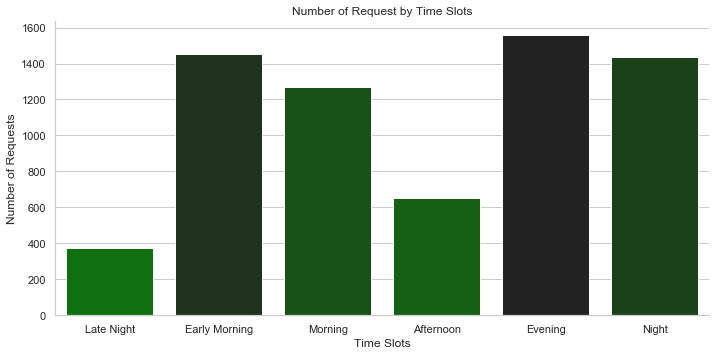

In [137]:
sns.set(style="whitegrid")
sns.set_context("notebook")
data = df.groupby("Time Slots").size() 
pal = sns.dark_palette("Green", len(data))
rank = data.argsort().argsort()   

ax = sns.catplot(x="Time Slots", data=df,kind='count',aspect=2,palette=np.array(pal[::-1])[rank])
ax.set(xlabel = "Time Slots", ylabel = "Number of Requests", title = "Number of Request by Time Slots")
plt.savefig("Fig 1.png",bbox_inches='tight') 

<font color='blue'>Observations</font></n>
</n>Here we can see during evening time is the time when there is most demand for cabs.

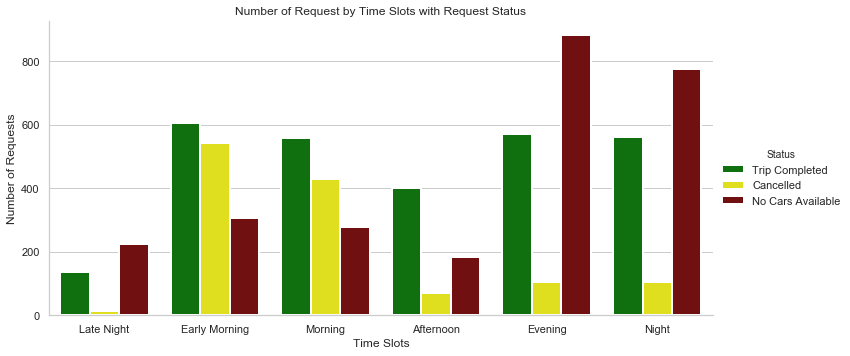

In [138]:
bx = sns.catplot(x="Time Slots",hue='Status', data=df,kind='count',aspect=2,palette = ['green', 'yellow', 'maroon'] ,lw=2)
bx.set(xlabel = "Time Slots", ylabel = "Number of Requests", title = "Number of Request by Time Slots with Request Status")
plt.savefig("Fig 2.png",bbox_inches='tight') 

<font color='blue'>Observations</font></n>
<br>Most number of "No Cars Available" Status is seen during Evening Time and Night Time and least during Afternoon.<br>
Most number of "Cancelled" Status is seen during Early Morning and least during afternoon <br>
Most number of "Trip Completed" Status is seen during Early Morning and least during Late Night


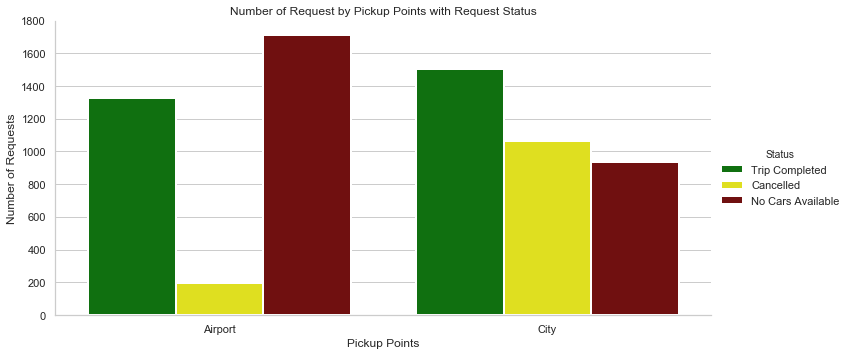

In [139]:
cx = sns.catplot(x="Pickup point",hue='Status', data=df,kind='count',aspect=2,palette = ['green', 'yellow', 'maroon'] ,lw=2)
cx.set(xlabel = "Pickup Points", ylabel = "Number of Requests", title = "Number of Request by Pickup Points with Request Status")
plt.savefig("Fig 3.png",bbox_inches='tight') 

<font color='blue'>Observations</font></n>
<br>Most Cancelled requests comes when the journey starts from Airport

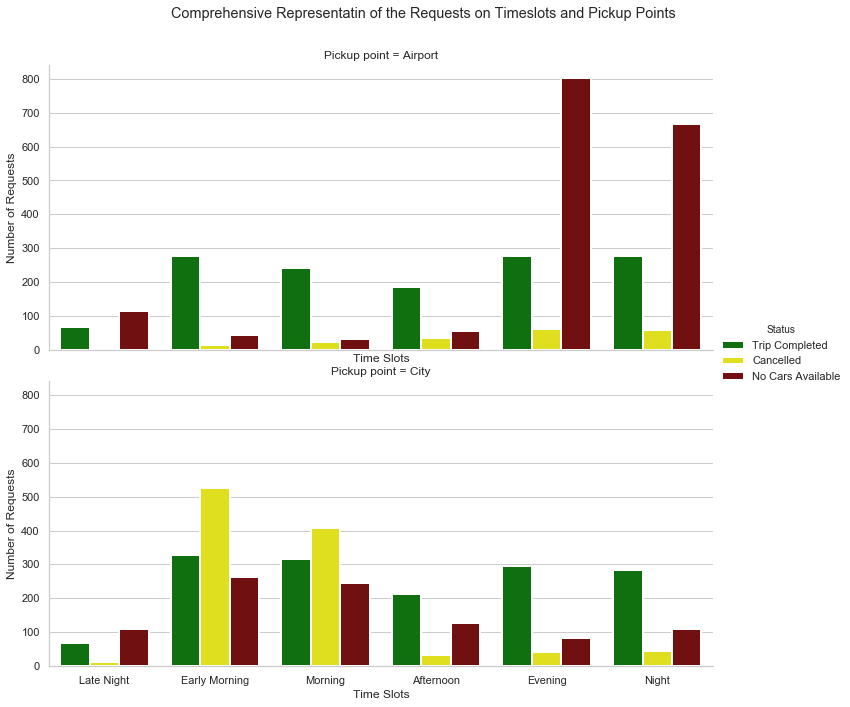

In [140]:
dx = sns.catplot(x='Time Slots',hue='Status', col='Pickup point',col_wrap=1, data=df,kind='count',aspect=2,palette = ['green', 'yellow', 'maroon'] ,lw=2)
dx.set(xlabel = "Time Slots", ylabel = "Number of Requests")
plt.subplots_adjust(top=0.9)
dx.fig.suptitle('Comprehensive Representatin of the Requests on Timeslots and Pickup Points ')
plt.savefig("Fig 4.png",bbox_inches='tight') 

<font color='blue'>Observations</font></n>
<br>The main observations are that 
<br>1) At the airport, during Evening and Night, there are most "No cars available"
<br>2) At city area, most "Cancellations" happen during Early Morning and Morning Times


<font color='blue'>Pie Chart to show above observations</font>

In [104]:
uber_airport_evenings = df.loc[(df["Pickup point"] == "Airport") & ((df['Time Slots'] == "Evening")|(df['Time Slots'] == "Night"))]
uber_city_mornings = df.loc[(df["Pickup point"] == "City") & ((df['Time Slots'] == "Early Morning")|(df['Time Slots'] == "Morning"))]

In [106]:
uber_airport_evenings_count = pd.DataFrame(uber_airport_evenings.Status.value_counts())
uber_city_mornings_count = pd.DataFrame(uber_city_mornings.Status.value_counts())

In [120]:
colors=['red','green','yellow']

In [151]:
colors1=['yellow','green','red']

In [108]:
#uber_airport_evenings_count
uber_city_mornings_count

,Status
Cancelled,932
Trip Completed,643
No Cars Available,508


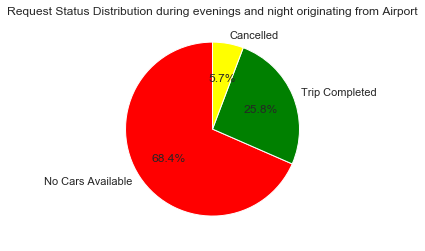

In [149]:
plt.pie(
    uber_airport_evenings_count,
    labels=uber_airport_evenings_count.index.values,
    colors=colors, 
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('Request Status Distribution during evenings and night originating from Airport')

plt.savefig("Pie 1.png",bbox_inches='tight') 

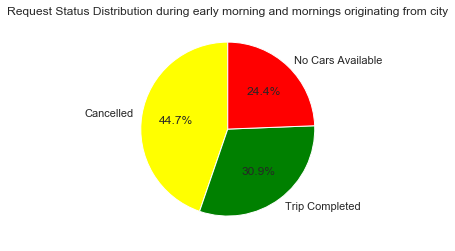

In [152]:
plt.pie(
    uber_city_mornings_count,
    labels=uber_city_mornings_count.index.values,
    colors=colors1, 
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('Request Status Distribution during early morning and mornings originating from city')
plt.savefig("Pie 2.png",bbox_inches='tight') 

In [28]:
df['Demand']=1
df.loc[df['Status']=='Trip Completed','Supply']= 1
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request Year,Request Month,Request Day,Request Hour,Request Minute,Drop timestamp,Drop Year,Drop Month,Drop Day,Drop Hour,Drop Minute,Time Slots,Demand,Supply
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016,7,11,11,51,2016-07-11 13:00:00,2016.0,7.0,11.0,13.0,0.0,Morning,1,1.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016,7,11,17,57,2016-07-11 18:47:00,2016.0,7.0,11.0,18.0,47.0,Evening,1,1.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016,7,12,9,17,2016-07-12 09:58:00,2016.0,7.0,12.0,9.0,58.0,Morning,1,1.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016,7,12,21,8,2016-07-12 22:03:00,2016.0,7.0,12.0,22.0,3.0,Night,1,1.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016,7,13,8,33,2016-07-13 09:25:47,2016.0,7.0,13.0,9.0,25.0,Morning,1,1.0


In [502]:
#df.groupby(['Time Slots']).size()

Time Slots
Late Night        375
Early Morning    1452
Morning          1268
Afternoon         651
Evening          1560
Night            1439
dtype: int64

In [236]:
#df[df['Request Hour']==0]

,Request id,Pickup point,Driver id,Status,Request timestamp,Request Year,Request Month,Request Day,Request Hour,Request Minute,Drop timestamp,Drop Year,Drop Month,Drop Day,Drop Hour,Drop Minute,Time Slots,Demand,Supply
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:39,2016,7,15,0,3,2016-07-15 01:07:39,2016.0,7.0,15.0,1.0,7.0,Late Night,1,1.0
217,1371,Airport,23.0,Trip Completed,2016-07-12 00:22:00,2016,7,12,0,22,2016-07-12 01:33:00,2016.0,7.0,12.0,1.0,33.0,Late Night,1,1.0
231,2689,Airport,24.0,Trip Completed,2016-07-13 00:34:03,2016,7,13,0,34,2016-07-13 01:49:08,2016.0,7.0,13.0,1.0,49.0,Late Night,1,1.0
455,6761,Airport,47.0,Trip Completed,2016-07-15 00:05:00,2016,7,15,0,5,2016-07-15 00:47:06,2016.0,7.0,15.0,0.0,47.0,Late Night,1,1.0
567,5382,City,59.0,Trip Completed,2016-07-14 00:08:01,2016,7,14,0,8,2016-07-14 00:42:31,2016.0,7.0,14.0,0.0,42.0,Late Night,1,1.0
611,5394,Airport,64.0,Trip Completed,2016-07-15 00:47:57,2016,7,15,0,47,2016-07-15 01:42:51,2016.0,7.0,15.0,1.0,42.0,Late Night,1,1.0
776,3,Airport,80.0,Trip Completed,2016-07-11 00:24:00,2016,7,11,0,24,2016-07-11 01:31:00,2016.0,7.0,11.0,1.0,31.0,Late Night,1,1.0
787,5384,Airport,80.0,Trip Completed,2016-07-14 00:03:40,2016,7,14,0,3,2016-07-14 01:03:59,2016.0,7.0,14.0,1.0,3.0,Late Night,1,1.0
971,4030,City,100.0,Trip Completed,2016-07-14 00:13:43,2016,7,14,0,13,2016-07-14 00:47:55,2016.0,7.0,14.0,0.0,47.0,Late Night,1,1.0
1042,6766,City,108.0,Trip Completed,2016-07-15 00:06:56,2016,7,15,0,6,2016-07-15 01:10:34,2016.0,7.0,15.0,1.0,10.0,Late Night,1,1.0


In [29]:
SlotDF=df.groupby(['Time Slots'])['Demand','Supply'].count().reset_index()
SlotDF.head(10)

,Time Slots,Demand,Supply
0,Late Night,375,136
1,Early Morning,1452,604
2,Morning,1268,559
3,Afternoon,651,400
4,Evening,1560,572
5,Night,1439,560


In [30]:
SlotDF['GAP'] = SlotDF['Demand']-SlotDF['Supply']
SlotDF.head(10)

,Time Slots,Demand,Supply,GAP
0,Late Night,375,136,239
1,Early Morning,1452,604,848
2,Morning,1268,559,709
3,Afternoon,651,400,251
4,Evening,1560,572,988
5,Night,1439,560,879


In [31]:
HoursDF=df.groupby(['Request Hour'])['Demand','Supply'].count().reset_index()
HoursDF['GAP'] = HoursDF['Demand']-HoursDF['Supply']
HoursDF.head(10)

,Request Hour,Demand,Supply,GAP
0,0,99,40,59
1,1,85,25,60
2,2,99,37,62
3,3,92,34,58
4,4,203,78,125
5,5,445,185,260
6,6,398,167,231
7,7,406,174,232
8,8,423,155,268
9,9,431,173,258


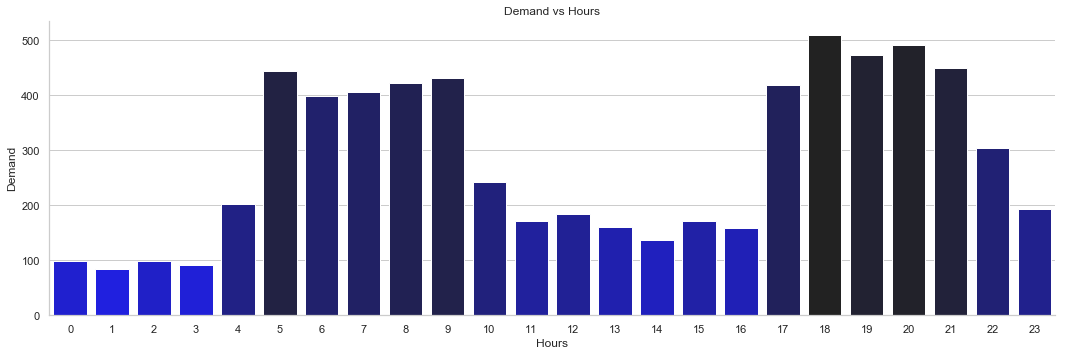

In [62]:
data1 = df.groupby("Request Hour").size() 
pal1 = sns.dark_palette("Blue", len(data1))
rank1 = data1.argsort().argsort()   

fx = sns.catplot(x='Request Hour', y='Demand',data=HoursDF,kind ='bar', aspect=3,palette=np.array(pal1[::-1])[rank1])
fx.set(xlabel = "Hours", ylabel = "Demand", title = "Demand vs Hours")

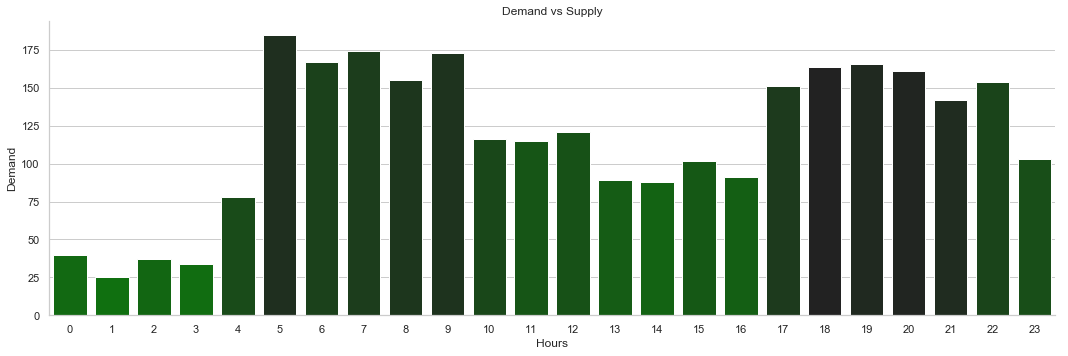

In [63]:
pal2 = sns.dark_palette("Green", len(data1))
gx = sns.catplot(x='Request Hour', y='Supply',data=HoursDF,kind ='bar', aspect=3, palette=np.array(pal2[::-1])[rank1])
gx.set(xlabel = "Hours", ylabel = "Demand", title = "Demand vs Supply")

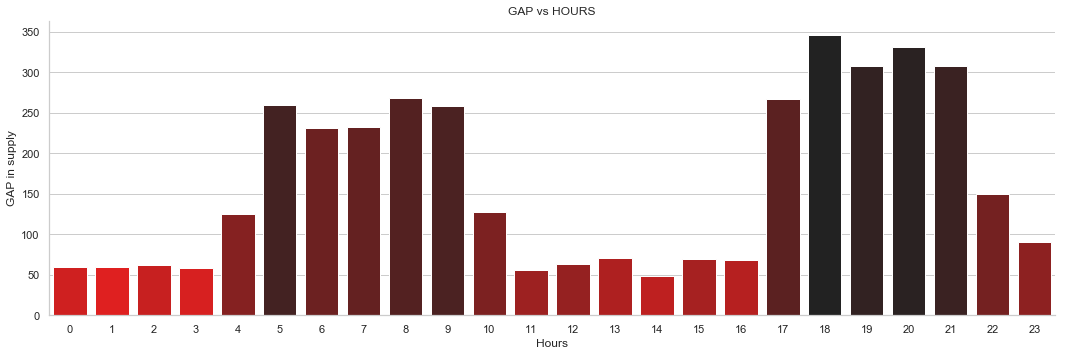

In [145]:
pal3 = sns.dark_palette("Red", len(data1))
hx = sns.catplot(x='Request Hour', y='GAP',data=HoursDF,kind ='bar', aspect=3, palette=np.array(pal3[::-1])[rank1])
hx.set(xlabel = "Hours", ylabel = "GAP in supply", title = "GAP vs HOURS")
plt.savefig("Fig 5.png",bbox_inches='tight') 

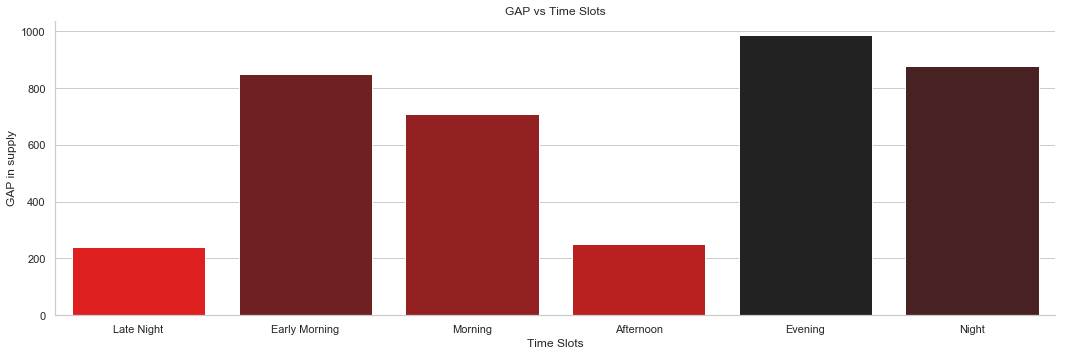

In [146]:
data4 = SlotDF.groupby("Time Slots")['GAP'].sum()
pal4 = sns.dark_palette("Red", len(data4))
rank4 = data4.argsort().argsort()   
zx = sns.catplot(x="Time Slots", y='GAP',data=SlotDF,kind ='bar', aspect=3, palette=np.array(pal4[::-1])[rank4])
zx.set(xlabel = "Time Slots", ylabel = "GAP in supply", title = "GAP vs Time Slots")
plt.savefig("Fig 6.png",bbox_inches='tight') 


<font color='blue'>Observations</font></n>
<br> From both Fig 5 and Fig 6, we can see that during evening, the GAP in demand vs supply is at its worst.

In [37]:
PickupDF=df.groupby(['Pickup point','Time Slots'])['Demand','Supply'].count().reset_index()
PickupDF['GAP'] = PickupDF['Demand']-PickupDF['Supply']
PickupDF

,Pickup point,Time Slots,Demand,Supply,GAP
0,Airport,Late Night,181,67,114
1,Airport,Early Morning,336,277,59
2,Airport,Morning,301,243,58
3,Airport,Afternoon,278,187,91
4,Airport,Evening,1140,276,864
5,Airport,Night,1002,277,725
6,City,Late Night,194,69,125
7,City,Early Morning,1116,327,789
8,City,Morning,967,316,651
9,City,Afternoon,373,213,160


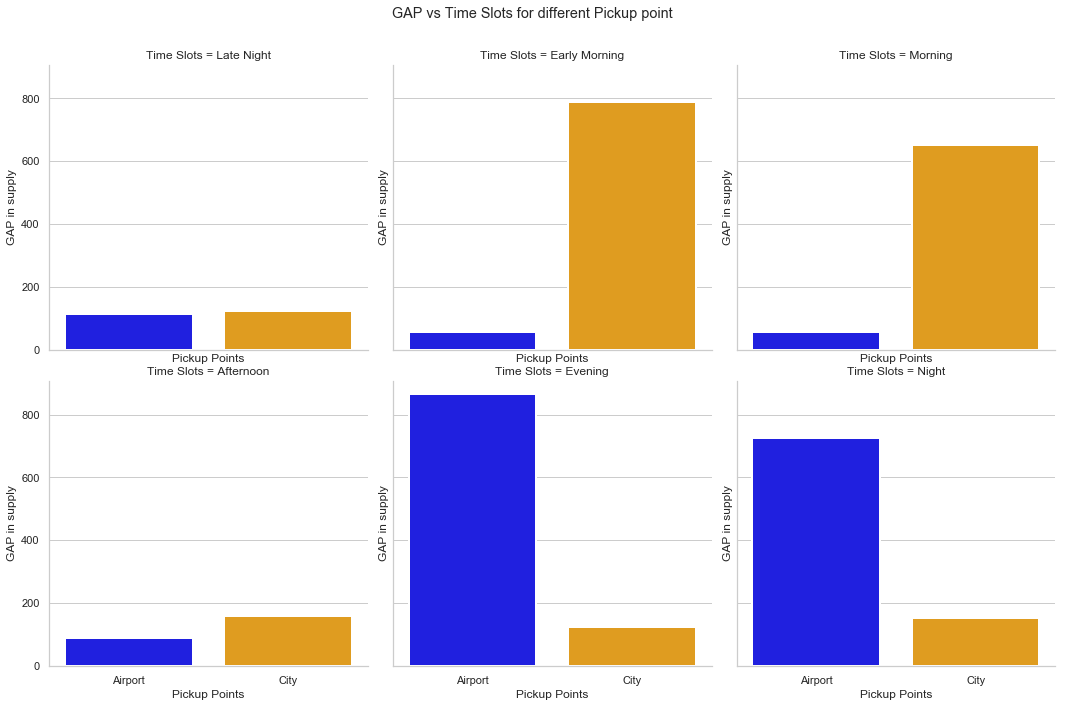

In [147]:
lx = sns.catplot(x='Pickup point',y='GAP', col='Time Slots',col_wrap=3, data=PickupDF,kind='bar',aspect=1,palette = ['blue', 'orange'] ,lw=2)
lx.set(xlabel = "Pickup Points", ylabel = "GAP in supply")
plt.subplots_adjust(top=0.9)
lx.fig.suptitle('GAP vs Time Slots for different Pickup point ')
plt.savefig("Fig 7.png",bbox_inches='tight') 

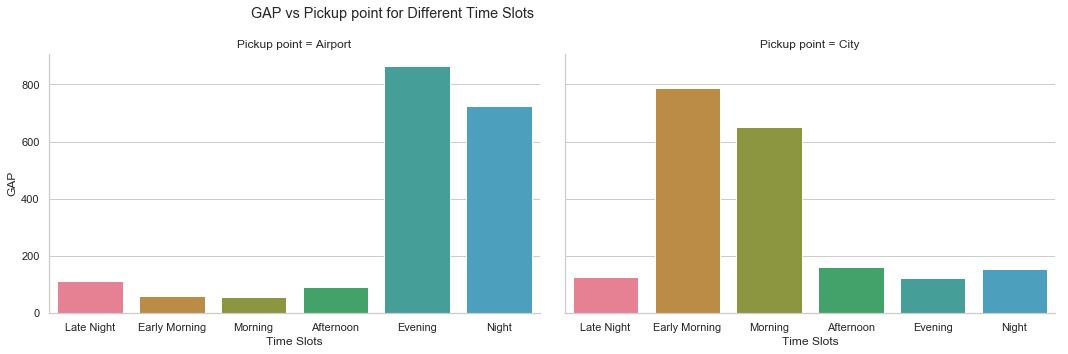

In [148]:
mx = sns.catplot(x='Time Slots',y='GAP', col='Pickup point',data=PickupDF,kind='bar',aspect=1.5,palette=sns.color_palette("husl", 8))
lx.set(xlabel = "Pickup Points", ylabel = "GAP in supply")
plt.subplots_adjust(top=0.85)
mx.fig.suptitle('GAP vs Pickup point for Different Time Slots',ha='right')
plt.savefig("Fig 8.png",bbox_inches='tight') 

<font color='blue'>Observations</font></n>
<br> At Airport - GAP in supply is the worst during evening and night
<br> At City - GAP in supply is the worst during Early Morning and Morning